In [1]:
import pandas as pd
import numpy as np

In [2]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data

In [3]:
#Importing and Naming the columns of the Train data & Test data
colnames = ['status_Account', 'duration', 'credit_history',
             'purpose', 'credit_amount', 'savings_account', 'employment_since',
             'installment_rate', 'personal_status_sex', 'debtors', 
             'residence_since', 'property', 'age', 'other_installment_plans',
             'housing', 'existing_credits', 'job', 'people_provide_maintenance',
             'telephone', 'foreign_worker', 'creditworthy']

df = pd.read_csv('kredit.dat', header=None, sep="\t", names=colnames)
df.shape

(1000, 21)

In [4]:
df.head()

,status_Account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_provide_maintenance,telephone,foreign_worker,creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [5]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_provide_maintenance,creditworthy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   status_Account              1000 non-null   object
 1   duration                    1000 non-null   int64 
 2   credit_history              1000 non-null   object
 3   purpose                     1000 non-null   object
 4   credit_amount               1000 non-null   int64 
 5   savings_account             1000 non-null   object
 6   employment_since            1000 non-null   object
 7   installment_rate            1000 non-null   int64 
 8   personal_status_sex         1000 non-null   object
 9   debtors                     1000 non-null   object
 10  residence_since             1000 non-null   int64 
 11  property                    1000 non-null   object
 12  age                         1000 non-null   int64 
 13  other_installment_plans     1000 non-null   objec

In [7]:
df.head()

,status_Account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_provide_maintenance,telephone,foreign_worker,creditworthy
0,A14,36,A32,?,2299,A63,?,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,?,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,?,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,?,2,A191,?,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [8]:
#Value transformation
df.replace('A201', 1, inplace=True)
df.replace('A202', 0, inplace=True)
df.replace('A191', 0, inplace=True)
df.replace('A192', 1, inplace=True)
df.creditworthy.replace([1,2], [1,0], inplace=True)

In [9]:
df.replace("?", np.nan, inplace=True)

In [10]:
#Missing Values
df.isnull().sum()

status_Account                  0
duration                        0
credit_history                  0
purpose                       173
credit_amount                   0
savings_account                 0
employment_since              496
installment_rate                0
personal_status_sex             0
debtors                         0
residence_since                 0
property                        0
age                             0
other_installment_plans         0
housing                         0
existing_credits                0
job                           232
people_provide_maintenance      0
telephone                       0
foreign_worker                360
creditworthy                    0
dtype: int64

In [11]:
df["purpose"].value_counts()

A43     226
A40     200
A42     152
A41      85
A49      79
A46      41
A45      17
A44      10
A410      9
A48       8
Name: purpose, dtype: int64

In [12]:
df["employment_since"].value_counts()

A73    157
A75    133
A74     96
A72     85
A71     33
Name: employment_since, dtype: int64

In [13]:
df["job"].value_counts()

A173    484
A172    152
A174    116
A171     16
Name: job, dtype: int64

In [14]:
df["foreign_worker"].value_counts()

1.0    613
0.0     27
Name: foreign_worker, dtype: int64

In [15]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [16]:
#Checking missing values
df.isnull().sum()

status_Account                0
duration                      0
credit_history                0
purpose                       0
credit_amount                 0
savings_account               0
employment_since              0
installment_rate              0
personal_status_sex           0
debtors                       0
residence_since               0
property                      0
age                           0
other_installment_plans       0
housing                       0
existing_credits              0
job                           0
people_provide_maintenance    0
telephone                     0
foreign_worker                0
creditworthy                  0
dtype: int64

In [18]:
#Seperate the target variable to another DataFrame
target = df[df.columns[-1]]

In [23]:
df = df.drop(columns=['creditworthy'])

In [27]:
print(df.shape)
print(target.shape)

(1000, 20)
(1000,)


In [28]:
df['installment_rate'].value_counts(ascending=True)

1    136
3    157
2    231
4    476
Name: installment_rate, dtype: int64

In [34]:
df["foreign_worker"].value_counts()

1.0    973
0.0     27
Name: foreign_worker, dtype: int64

In [40]:
for col in ['telephone', 'foreign_worker']:
    df[col] = df[col].astype('category')

[[<AxesSubplot:title={'center':'duration'}>
  <AxesSubplot:title={'center':'credit_amount'}>
  <AxesSubplot:title={'center':'installment_rate'}>]
 [<AxesSubplot:title={'center':'residence_since'}>
  <AxesSubplot:title={'center':'age'}>
  <AxesSubplot:title={'center':'existing_credits'}>]
 [<AxesSubplot:title={'center':'people_provide_maintenance'}>
  <AxesSubplot:> <AxesSubplot:>]]


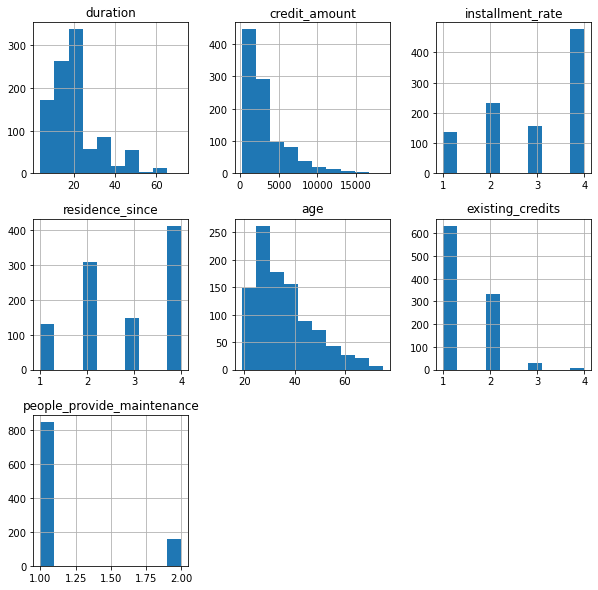

In [47]:
print(df.hist(figsize = (10,10)))